In [69]:
import random

import numpy as np
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [141]:
class KMeans:
    def cal_dist(self, p0, p1):
        """
        比較兩點的距離
        """
        return cosine_similarity([p0], [p1])[0][0]
    
    def nearest_cluster_center(self, point, cluster_centers):
        """
        找到距離 point 最近的中心點
        """
        min_dist = float("inf")
        m = cluster_centers.shape[0]
        for i in range(m):
            d = self.cal_dist(point, cluster_centers[i])
            if min_dist > d:
                min_dist = d
        return min_dist 

    def get_centroids(self, datapoints, k):
        """
        K-means++ 演算法，取得初始化中心點
        """
        clusters = np.array([random.choice(datapoints)])
        dist = np.zeros(len(datapoints))
        
        for i in range(k-1):
            sum_dist = 0
            for j, point in enumerate(datapoints):
                dist[j] = self.nearest_cluster_center(point, clusters)
                sum_dist += dist[j]
            
            sum_dist *= random.random()
            for j, d in enumerate(dist):
                sum_dist = sum_dist - d
                if sum_dist <= 0:
                    clusters = np.append(clusters, [datapoints[j]], axis=0)
                    break
        
        return clusters
        
        
    def kmeans_plus_plus(self, datapoints, k=2):
        """
        K-means 演算法
        """
        # 定義資料維度
        d = datapoints.shape[1]
        # 最大的迭代次數
        Max_Iterations = 1000

        cluster = np.zeros(datapoints.shape[0])
        prev_cluster = np.ones(datapoints.shape[0])

        cluster_centers = self.get_centroids(datapoints, k)

        iteration = 0
        while np.array_equal(cluster, prev_cluster) is False or iteration > Max_Iterations:
            iteration += 1
            prev_cluster = cluster.copy()

            # 將每一個點做分群
            for idx, point in enumerate(datapoints):
                min_dist = float("inf")
                for c, cluster_center in enumerate(cluster_centers):
                    dist = self.cal_dist(point, cluster_center)
                    if dist < min_dist:
                        min_dist = dist  
                        cluster[idx] = c   # 指定該點屬於哪個分群

            # 更新分群的中心
            for k in range(len(cluster_centers)):
                new_center = np.zeros(d)
                members = 0
                for point, c in zip(datapoints, cluster):
                    if c == k:
                        new_center += point
                        members += 1
                if members > 0:
                    new_center = new_center / members
                cluster_centers[k] = new_center

        return cluster

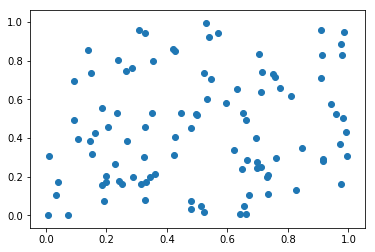

In [142]:
datapoints = np.random.rand(100, 2)
plt.scatter(datapoints[:, 0], datapoints[:, 1])

In [143]:
K = KMeans()
result = K.kmeans_plus_plus(datapoints)

[0.97438546]
[0.9999796]
[0.86361234]
[0.79492003]
[0.49346673]
[0.99387625]
[0.92230285]
[0.62920782]
[0.99837128]
[0.76699565]
[0.94728604]
[0.45483439]
[0.88207462]
[0.79412673]
[0.85143213]
[0.94872036]
[0.98903628]
[0.89749361]
[0.98751447]
[0.93981797]
[0.97576536]
[0.89029491]
[0.83267741]
[0.97402561]
[0.9718847]
[0.75186725]
[0.40485326]
[0.99999956]
[0.78971429]
[0.79873123]
[0.68961857]
[0.93244887]
[0.92513583]
[0.53756711]
[0.57887377]
[0.42751262]
[1.]
[0.81663445]
[0.99991852]
[0.72387429]
[0.98258606]
[0.9964024]
[0.99346979]
[0.79430195]
[0.28160683]
[0.45473301]
[0.84114738]
[0.82376119]
[0.87710873]
[0.82138863]
[0.99437707]
[0.9134665]
[0.78964971]
[0.18562689]
[0.76270909]
[0.99041628]
[0.97809782]
[0.82151308]
[0.96723401]
[0.87185653]
[0.4868588]
[0.4648029]
[0.44627839]
[0.83262375]
[0.98279016]
[0.83539017]
[0.85075593]
[0.98968902]
[0.69674556]
[0.54475739]
[0.752899]
[0.33152703]
[0.99997203]
[0.81475762]
[0.48985623]
[0.94073331]
[0.93159793]
[0.47274427]
[0

[0.93009797]
[0.]
[0.53507368]
[0.98949012]
[0.]
[0.88468646]
[0.8544606]
[0.]
[0.99649085]
[0.98875268]
[0.]
[0.88701274]
[0.9840751]
[0.]
[0.89984525]
[0.64037931]
[0.]
[0.96996248]
[0.99769781]
[0.]
[0.76615919]
[0.96571328]
[0.]
[0.62730863]
[0.99990565]
[0.]
[0.81599512]
[0.87719996]
[0.]
[0.42586198]
[0.74876618]
[0.]
[0.99553696]
[0.99355538]
[0.]
[0.86955659]
[0.94707626]
[0.]
[0.57607403]
[0.92639721]
[0.]
[0.97037515]
[0.93587382]
[0.]
[0.96376577]
[0.94062933]
[0.]
[0.56000771]
[0.69188439]
[0.]
[0.98444388]
[0.96925129]
[0.]
[0.92812289]
[0.91753957]
[0.]
[0.97564885]
[0.79483785]
[0.]
[0.99975864]
[0.99768627]
[0.]
[0.76605001]
[0.88243331]
[0.]
[0.43579854]
[0.9801064]
[0.]
[0.6749614]
[0.98382926]
[0.]
[0.90044541]
[0.97258677]
[0.]
[0.64881269]
[0.99429475]
[0.]
[0.86621787]
[0.89822423]
[0.]
[0.46676392]
[0.66078051]
[0.]
[0.97614697]
[0.86457268]
[0.]
[0.40247132]
[0.82113437]
[0.]
[0.99974273]
[0.88961626]
[0.]
[0.98788888]
[0.98957595]
[0.]
[0.71470161]
[0.99161355]

[0.92360434]
[0.]
[0.]
[0.84242675]
[0.]
[0.]
[0.84723816]
[0.]
[0.]
[0.99847637]
[0.]
[0.]
[0.85395026]
[0.]
[0.]
[0.97979487]
[0.]
[0.]
[0.9311881]
[0.]
[0.]
[0.79917076]
[0.]
[0.]
[0.78109651]
[0.]
[0.]
[0.99568728]
[0.]
[0.]
[0.74830303]
[0.]
[0.]
[0.85838044]
[0.]
[0.]
[0.99993544]
[0.]
[0.]
[0.99908632]
[0.]
[0.]
[0.99825738]
[0.]
[0.]
[0.99889932]
[0.]
[0.]
[0.78622011]
[0.]
[0.]
[0.99008175]
[0.]
[0.]
[0.99495146]
[0.]
[0.]
[0.6792511]
[0.]
[0.]
[0.989754]
[0.]
[0.]
[0.76575026]
[0.]
[0.]
[0.93925158]
[0.]
[0.]
[0.99890953]
[0.]
[0.]
[0.95434545]
[0.]
[0.]
[0.99883784]
[0.]
[0.]
[0.87648986]
[0.]
[0.]
[0.86414249]
[0.]
[0.]
[0.85348372]
[0.]
[0.]
[0.99963725]
[0.]
[0.]
[0.93078594]
[0.]
[0.]
[0.99975972]
[0.]
[0.]
[0.99997784]
[0.]
[0.]
[0.76241514]
[0.]
[0.]
[0.97135843]
[0.]
[0.]
[0.90701132]
[0.]
[0.]
[0.98749536]
[0.]
[0.]
[0.78205321]
[0.]
[0.]
[0.85118765]
[0.]
[0.]
[0.99829209]
[0.]
[0.]
[0.87813831]
[0.]
[0.]
[0.97718465]
[0.]
[0.]
[0.98237625]
[0.]
[0.]
[0.86863191]
[0

[0.94294544]
[0.]
[0.]
[0.99619805]
[0.]
[0.]
[0.99963985]
[0.]
[0.]
[0.94551845]
[0.]
[0.]
[0.94849583]
[0.]
[0.]
[0.98724723]
[0.]
[0.]
[0.82873878]
[0.]
[0.]
[0.84773593]
[0.]
[0.]
[0.99496202]
[0.]
[0.]
[0.99634019]
[0.]
[0.]
[0.96896134]
[0.]
[0.]
[0.98193465]
[0.]
[0.]
[0.98547819]
[0.]
[0.]
[0.90337751]
[0.]
[0.]
[0.92360434]
[0.]
[0.]
[0.84242675]
[0.]
[0.]
[0.84723816]
[0.]
[0.]
[0.99847637]
[0.]
[0.]
[0.85395026]
[0.]
[0.]
[0.97979487]
[0.]
[0.]
[0.9311881]
[0.]
[0.]
[0.79917076]
[0.]
[0.]
[0.78109651]
[0.]
[0.]
[0.99568728]
[0.]
[0.]
[0.74830303]
[0.]
[0.]
[0.85838044]
[0.]
[0.]
[0.99993544]
[0.]
[0.]
[0.99908632]
[0.]
[0.]
[0.99825738]
[0.]
[0.]
[0.99889932]
[0.]
[0.]
[0.78622011]
[0.]
[0.]
[0.99008175]
[0.]
[0.]
[0.99495146]
[0.]
[0.]
[0.6792511]
[0.]
[0.]
[0.989754]
[0.]
[0.]
[0.76575026]
[0.]
[0.]
[0.93925158]
[0.]
[0.]
[0.99890953]
[0.]
[0.]
[0.95434545]
[0.]
[0.]
[0.99883784]
[0.]
[0.]
[0.87648986]
[0.]
[0.]
[0.86414249]
[0.]
[0.]
[0.85348372]
[0.]
[0.]
[0.99963725]
[0

[0.]
[0.90361239]
[0.]
[0.94499809]
[0.]
[0.]
[0.85061418]
[0.]
[0.]
[0.99949991]
[0.]
[0.]
[0.99578121]
[0.]
[0.]
[0.88011435]
[0.]
[0.]
[0.90074836]
[0.]
[0.]
[0.98670704]
[0.]
[0.]
[0.94596751]
[0.]
[0.]
[0.81555208]
[0.]
[0.]
[0.99068218]
[0.]
[0.]
[0.9727718]
[0.]
[0.]
[0.85843883]
[0.]
[0.]
[0.99758699]
[0.]
[0.]
[0.99566048]
[0.]
[0.]
[0.99996843]
[0.]
[0.]
[0.97171739]
[0.]
[0.]
[0.916395]
[0.]
[0.]
[0.99467046]
[0.]
[0.]
[0.92034107]
[0.]
[0.]
[0.97775222]
[0.]
[0.]
[0.94294544]
[0.]
[0.]
[0.99619805]
[0.]
[0.]
[0.99963985]
[0.]
[0.]
[0.94551845]
[0.]
[0.]
[0.94849583]
[0.]
[0.]
[0.98724723]
[0.]
[0.]
[0.82873878]
[0.]
[0.]
[0.84773593]
[0.]
[0.]
[0.99496202]
[0.]
[0.]
[0.99634019]
[0.]
[0.]
[0.96896134]
[0.]
[0.]
[0.98193465]
[0.]
[0.]
[0.98547819]
[0.]
[0.]
[0.90337751]
[0.]
[0.]
[0.92360434]
[0.]
[0.]
[0.84242675]
[0.]
[0.]
[0.84723816]
[0.]
[0.]
[0.99847637]
[0.]
[0.]
[0.85395026]
[0.]
[0.]
[0.97979487]
[0.]
[0.]
[0.9311881]
[0.]
[0.]
[0.79917076]
[0.]
[0.]
[0.78109651]
[0

[0.99975972]
[0.]
[0.]
[0.99997784]
[0.]
[0.]
[0.76241514]
[0.]
[0.]
[0.97135843]
[0.]
[0.]
[0.90701132]
[0.]
[0.]
[0.98749536]
[0.]
[0.]
[0.78205321]
[0.]
[0.]
[0.85118765]
[0.]
[0.]
[0.99829209]
[0.]
[0.]
[0.87813831]
[0.]
[0.]
[0.97718465]
[0.]
[0.]
[0.98237625]
[0.]
[0.]
[0.86863191]
[0.]
[0.]
[0.8052761]
[0.]
[0.]
[0.99706908]
[0.]
[0.]
[0.97206949]
[0.]
[0.]
[0.88698996]
[0.]
[0.]
[0.97131805]
[0.]
[0.]
[0.78886782]
[0.]
[0.]
[0.93165869]
[0.]
[0.]
[0.99996772]
[0.]
[0.]
[0.91841779]
[0.]
[0.]
[0.9978769]
[0.]
[0.]
[0.80971561]
[0.]
[0.]
[0.77952269]
[0.]
[0.]
[0.7657805]
[0.]
[0.]
[0.90672025]
[0.]
[0.]
[0.9546701]
[0.]
[0.]
[0.95031201]
[0.]
[0.]
[0.99909937]
[0.]
[0.]
[0.9363819]
[0.]
[0.]
[0.96278595]
[0.]
[0.]
[0.91530618]
[0.]
[0.]
[0.9170689]
[0.]
[0.]
[0.90361239]
[0.]
[0.94499809]
[0.]
[0.]
[0.85061418]
[0.]
[0.]
[0.99949991]
[0.]
[0.]
[0.99578121]
[0.]
[0.]
[0.88011435]
[0.]
[0.]
[0.90074836]
[0.]
[0.]
[0.98670704]
[0.]
[0.]
[0.94596751]
[0.]
[0.]
[0.81555208]
[0.]
[0.]

[0.]
[0.]
[0.93078594]
[0.]
[0.]
[0.99975972]
[0.]
[0.]
[0.99997784]
[0.]
[0.]
[0.76241514]
[0.]
[0.]
[0.97135843]
[0.]
[0.]
[0.90701132]
[0.]
[0.]
[0.98749536]
[0.]
[0.]
[0.78205321]
[0.]
[0.]
[0.85118765]
[0.]
[0.]
[0.99829209]
[0.]
[0.]
[0.87813831]
[0.]
[0.]
[0.97718465]
[0.]
[0.]
[0.98237625]
[0.]
[0.]
[0.86863191]
[0.]
[0.]
[0.8052761]
[0.]
[0.]
[0.99706908]
[0.]
[0.]
[0.97206949]
[0.]
[0.]
[0.88698996]
[0.]
[0.]
[0.97131805]
[0.]
[0.]
[0.78886782]
[0.]
[0.]
[0.93165869]
[0.]
[0.]
[0.99996772]
[0.]
[0.]
[0.91841779]
[0.]
[0.]
[0.9978769]
[0.]
[0.]
[0.80971561]
[0.]
[0.]
[0.77952269]
[0.]
[0.]
[0.7657805]
[0.]
[0.]
[0.90672025]
[0.]
[0.]
[0.9546701]
[0.]
[0.]
[0.95031201]
[0.]
[0.]
[0.99909937]
[0.]
[0.]
[0.9363819]
[0.]
[0.]
[0.96278595]
[0.]
[0.]
[0.91530618]
[0.]
[0.]
[0.9170689]
[0.]
[0.]
[0.90361239]
[0.]
[0.94499809]
[0.]
[0.]
[0.85061418]
[0.]
[0.]
[0.99949991]
[0.]
[0.]
[0.99578121]
[0.]
[0.]
[0.88011435]
[0.]
[0.]
[0.90074836]
[0.]
[0.]
[0.98670704]
[0.]
[0.]
[0.94596751]

[0.]
[0.79917076]
[0.]
[0.]
[0.78109651]
[0.]
[0.]
[0.99568728]
[0.]
[0.]
[0.74830303]
[0.]
[0.]
[0.85838044]
[0.]
[0.]
[0.99993544]
[0.]
[0.]
[0.99908632]
[0.]
[0.]
[0.99825738]
[0.]
[0.]
[0.99889932]
[0.]
[0.]
[0.78622011]
[0.]
[0.]
[0.99008175]
[0.]
[0.]
[0.99495146]
[0.]
[0.]
[0.6792511]
[0.]
[0.]
[0.989754]
[0.]
[0.]
[0.76575026]
[0.]
[0.]
[0.93925158]
[0.]
[0.]
[0.99890953]
[0.]
[0.]
[0.95434545]
[0.]
[0.]
[0.99883784]
[0.]
[0.]
[0.87648986]
[0.]
[0.]
[0.86414249]
[0.]
[0.]
[0.85348372]
[0.]
[0.]
[0.99963725]
[0.]
[0.]
[0.93078594]
[0.]
[0.]
[0.99975972]
[0.]
[0.]
[0.99997784]
[0.]
[0.]
[0.76241514]
[0.]
[0.]
[0.97135843]
[0.]
[0.]
[0.90701132]
[0.]
[0.]
[0.98749536]
[0.]
[0.]
[0.78205321]
[0.]
[0.]
[0.85118765]
[0.]
[0.]
[0.99829209]
[0.]
[0.]
[0.87813831]
[0.]
[0.]
[0.97718465]
[0.]
[0.]
[0.98237625]
[0.]
[0.]
[0.86863191]
[0.]
[0.]
[0.8052761]
[0.]
[0.]
[0.99706908]
[0.]
[0.]
[0.97206949]
[0.]
[0.]
[0.88698996]
[0.]
[0.]
[0.97131805]
[0.]
[0.]
[0.78886782]
[0.]
[0.]
[0.9316586

[0.]
[0.]
[0.98193465]
[0.]
[0.]
[0.98547819]
[0.]
[0.]
[0.90337751]
[0.]
[0.]
[0.92360434]
[0.]
[0.]
[0.84242675]
[0.]
[0.]
[0.84723816]
[0.]
[0.]
[0.99847637]
[0.]
[0.]
[0.85395026]
[0.]
[0.]
[0.97979487]
[0.]
[0.]
[0.9311881]
[0.]
[0.]
[0.79917076]
[0.]
[0.]
[0.78109651]
[0.]
[0.]
[0.99568728]
[0.]
[0.]
[0.74830303]
[0.]
[0.]
[0.85838044]
[0.]
[0.]
[0.99993544]
[0.]
[0.]
[0.99908632]
[0.]
[0.]
[0.99825738]
[0.]
[0.]
[0.99889932]
[0.]
[0.]
[0.78622011]
[0.]
[0.]
[0.99008175]
[0.]
[0.]
[0.99495146]
[0.]
[0.]
[0.6792511]
[0.]
[0.]
[0.989754]
[0.]
[0.]
[0.76575026]
[0.]
[0.]
[0.93925158]
[0.]
[0.]
[0.99890953]
[0.]
[0.]
[0.95434545]
[0.]
[0.]
[0.99883784]
[0.]
[0.]
[0.87648986]
[0.]
[0.]
[0.86414249]
[0.]
[0.]
[0.85348372]
[0.]
[0.]
[0.99963725]
[0.]
[0.]
[0.93078594]
[0.]
[0.]
[0.99975972]
[0.]
[0.]
[0.99997784]
[0.]
[0.]
[0.76241514]
[0.]
[0.]
[0.97135843]
[0.]
[0.]
[0.90701132]
[0.]
[0.]
[0.98749536]
[0.]

KeyboardInterrupt: 

In [137]:
K = KMeans()
result = K.kmeans_plus_plus(datapoints)

0.41591379136218315
0.422614749393778
0.3185816176786557
0.5873565835839271
0.5618628701438615
0.2758051043605826
0.4824858720816059
0.3584860316900458
0.4528157394990418
0.40804424441018794
0.08654609592157332
0.605256478752627
0.4454988621475003
0.2323596202187779
0.42565285905512956
0.6392986691386568
0.28979830517786154
0.36860176463795413
0.5950918202332618
0.2439462264053467
0.5211921615680766
0.4180835522693912
0.6320377465367608
0.4427296112032052
0.6436411123842822
0.5677503832506866
0.253156649549442
0.7067480441230731
0.3692266324142431
0.6029742804561342
0.35960133609509154
0.5638711057864965
0.615058447999631
0.5743420778314264
0.3648808196376527
0.3577307748232907
0.22311840534275082
0.43893907756938555
0.3851639164364909
0.22135129477614476
0.6077045333591744
0.20994876576472726
0.5902215722169668
0.5554763315604336
0.2308037916336063
0.37700071930973006
0.1464500651288523
0.1577839336847117
0.38356419112313367
0.43204292551129553
0.5873195699118893
0.5051902249358978
0.

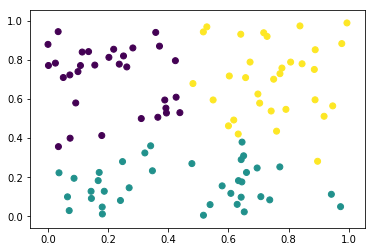

In [134]:
plt.scatter(datapoints[:, 0], datapoints[:, 1], c=result)